## 독립동일분포(i.i.d : independently and identically distributed)

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)
%precision 3
%matplotlib inline

In [27]:
linestyles = ['-', '--', ':', '-.']

# 통계계산함수 활용
# E(XY), Cov(XY)
# f_X(x), f_Y(y) : X와 Y의 주변확률밀도함수

def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

### 독립성
- 2개 이상의 확률변수가 서로 영향을 끼치지 않으면서 관계가 없음을 나타내는 개념
- fx,y(x,y) = fx(x) * fy(y) 
- 확률변수가 독립이면 결합확률은 주변확률밀도함수의 곱으로 표현된다


### 독립성과 무상관성
- 독립일 때는 무상관성을 만족하지만, 무상관이라고 해서 반드시 독립인 것은 아니다

In [28]:
# 불공정한 주사위 A, B의 눈이 각각 X, Y 확률변수로 표현될 때
x_set = np.array([1, 2, 3, 4, 5, 6])
y_set = np.array([1, 2, 3, 4, 5, 6])

def f_XY(x, y):
    if x in x_set and y in y_set:
        return x * y / 441
    else:
        return 0
    
XY = [x_set, y_set, f_XY]

In [29]:
# 공분산 0 -> 독립에서 무상관성을 만족함
Cov(XY)

-0.000

In [30]:
# 독립성과 무상관성 예시 확인
# {(0,0), (1,1), (1,-1)}로 각각 확률이 동일한 2차원 확률변수 (X,Y)가 있다고 할 때
x_set = np.array([0, 1])
y_set = np.array([-1, 0, 1])

def f_XY(x, y):
    if (x, y) in [(0, 0), (1, 1), (1, -1)]:
        return 1 / 3
    else:
        return 0
    
XY = [x_set, y_set, f_XY]

In [31]:
# 무상관성 확인
Cov(XY)

0.000

In [32]:
# 독립이라면 f_X(0) * f_Y(0) == f_XY(0, 0)
# 즉, 무상관성ㅇ르 만족함에도 독립은 아닐 수 있음
f_X(0) * f_Y(0), f_XY(0, 0)

(0.111, 0.333)

### 합의 분포
- 합의 분포의 기대값 
- 확률변수가 서로 독립이 아니여도 성립 : E( X1 + X2 + ... + Xn ) = E(X1) + E(X2) + ... + E(Xn)<br>


- 합의 분포의 분산
- 서로 독립이라면 성립 : V( X1 + X2 + ... + Xn ) = V(X1) + V(X2) + ... + V(Xn) 

### 대표 확률분포들의 합의 분포는 대표적인 형태의 확률분포를 따른다
- 정규분포의 합의 분포 -> 정규분포
- 푸아송 분포의 합의 분포 -> 푸아송 분포
- 베르누이 분포의 합의 분포 -> 이항분포


### 정규분포의 합의 분포

In [33]:
# 서로 독립인 확률변수 X,Y는 각각 X~N(1,2), Y~N(2,3)로 정의되어 있을 때
rv1 = stats.norm(1, np.sqrt(2))
rv2 = stats.norm(2, np.sqrt(3))

# 100만개 샘플 무작위 추출하여 기대값 및 분산의 유사성 확인
sample_size = int(1e6)
X_sample = rv1.rvs(sample_size) # rvs: random value sampling: 무작위 표번 생성
Y_sample = rv2.rvs(sample_size)

sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(3.003, 4.996)

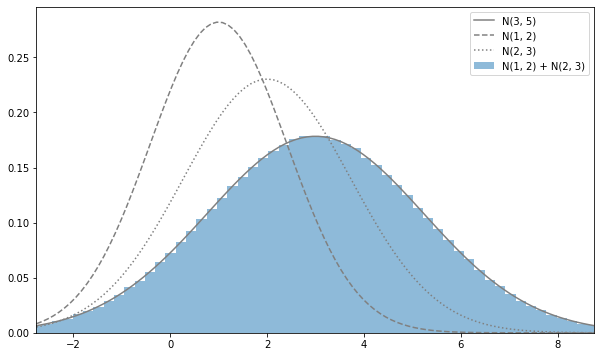

In [34]:
# 정규분포의 합의 분포 시각화 (재생성 만족)
# 재생성 : 동일한 분포를 따르는 2개의 독립인 확률변수의 합 또한 동일한 확률분포가 되는 성질

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# N(3,5) = N(1,2) + N(2,3)
rv = stats.norm(3, np.sqrt(5))
xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100)

ax.hist(sum_sample, bins=100, density=True,
        alpha=0.5, label='N(1, 2) + N(2, 3)')
ax.plot(xs, rv.pdf(xs), label='N(3, 5)', color='gray')
ax.plot(xs, rv1.pdf(xs), label='N(1, 2)', ls='--', color='gray')
ax.plot(xs, rv2.pdf(xs), label='N(2, 3)', ls=':', color='gray' )

ax.legend()
ax.set_xlim(rv.isf(0.995), rv.isf(0.005))
plt.show()

### 푸아송 분포의 합의 분포

In [35]:
# 서로 독립인 확률변수 X~Poi(3)과 X~Poi(4)로 정의되어 있을 때
# X~Poi(3) : 기대값도 3, 분산도 3
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

# 100만개 샘플 무작위 추출하여 기대값 및 분산의 유사성 확인
sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(6.999, 6.990)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  # Remove the CWD from sys.path while we load stuff.


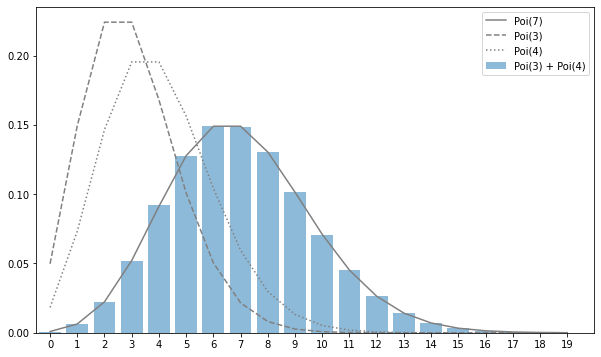

In [36]:
# 푸아송 분포의 합의 분포 시각화 (재생성 만족)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# Poi(7) = Poi(3) + Poi(4)
rv = stats.poisson(7)
xs = np.arange(20)
hist, _ = np.histogram(sum_sample, bins=20,
                       range=(0, 20), normed=True)

ax.bar(xs, hist, alpha=0.5, label='Poi(3) + Poi(4)')
ax.plot(xs, rv.pmf(xs), label='Poi(7)',  color='gray')
ax.plot(xs, rv1.pmf(xs), label='Poi(3)', ls='--', color='gray')
ax.plot(xs, rv2.pmf(xs), label='Poi(4)', ls=':',  color='gray')

ax.legend()
ax.set_xlim(-0.5, 20)
ax.set_xticks(np.arange(20))
plt.show()

### 베르누이 분포의 합의 분포

In [37]:
# 서로 독립인 확률변수 X1, X2, ... X10 가 동일 분포 Bern(0.3)로 정의되어 있을 때
# Bern(0.3) : 기대값은 0.3 (성공확률 = 0.3)/ 분산은 0.21 (성공확률 X 실패확률 = 0.3 X 0.7)
p = 0.3
rv = stats.bernoulli(p)

# 100만개 샘플 무작위 추출하여 기대값 및 분산의 유사성 확인
sample_size = int(1e6)
Xs_sample = rv.rvs((10, sample_size))
sum_sample = np.sum(Xs_sample, axis=0)

np.mean(sum_sample), np.var(sum_sample)

(2.999, 2.095)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  # Remove the CWD from sys.path while we load stuff.


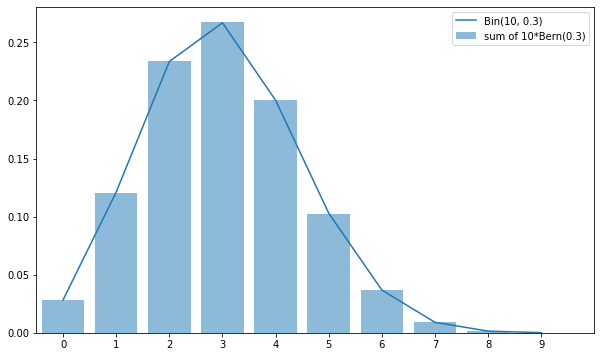

In [38]:
# 베르누이 분포의 합의 분포 (재생성 없음) -> 이항 분포 시각화

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# Bin(10,0.3) = 시그마(i=1~10까지)Bern(0.3)
rv = stats.binom(10, p)
xs = np.arange(10)
hist, _ = np.histogram(sum_sample, bins=10,
                       range=(0, 10), normed=True)
ax.bar(xs, hist, alpha=0.5, label='sum of 10*Bern(0.3)')
ax.plot(xs, rv.pmf(xs), label='Bin(10, 0.3)')
ax.legend()
ax.set_xlim(-0.5, 10)
ax.set_xticks(np.arange(10))
plt.show()

### 표본평균의 분포
- 모평균의 검정시 활용될 분포
- 중심극한정리 / 대수의 법칙 등의 성질을 포함하는 중요한 개념

### 정규분포의 표본평균 분포

In [41]:
# 10개의 확률변수가 서로 독립이면서, 동일한 분포 X1, X2, ... X10~N(1,2)를 만족할 때

mean = 1
var = 2
rv = stats.norm(mean, np.sqrt(var))

# 100만개 샘플을 무작위 추출하여 기대값 및 분산의 유사성 확인
n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(1.000, 0.200)

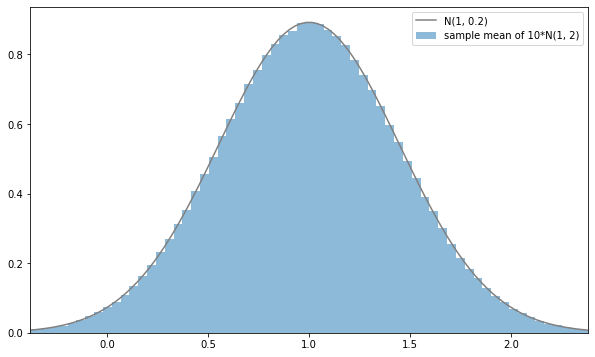

In [43]:
# 정규분포의 표본평균 분포
# 정규분포의 합의 분포 시각화 X(바)~N(1,2/10)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.norm(mean, np.sqrt(var/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)
ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='sample mean of 10*N(1, 2)')
ax.plot(xs, rv_true.pdf(xs), label='N(1, 0.2)', color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

### 푸아송 분포의 표본평균 분포

In [46]:
# 10개의 확률변수가 서로 독립이면서, 동일한 분포 X1, X2, ... X10~Poi(3)을 만족할 때
# E(X) = 3, V(X) = 3/10 -> 따라서, 푸아송 분포가 아님

l = 3
rv = stats.poisson(l)

# 100만개 샘플을 무작위 추출하여 기대값 및 분산의 유사성 확인
n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(3.000, 0.300)

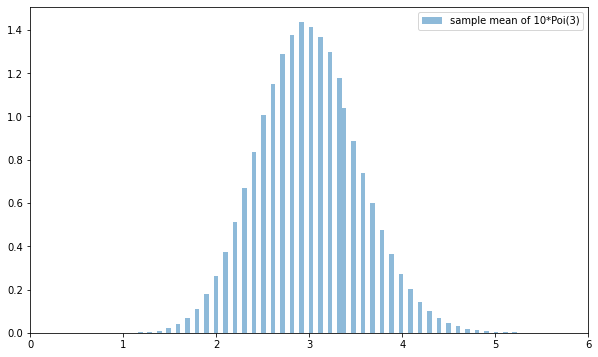

In [45]:
# 푸아송 분포의 표본평균 분포
# 푸아송 부포는 합의 분포가 푸아송 분포가 되지만, 표본평균 X 기대값 3, 분산 0.3으로 푸아송분포를 따르지 않는다.
# 푸아송 분포의 표본평균 분포 시각화

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='sample mean of 10*Poi(3)')

ax.legend()
ax.set_xlim(0, 6)
plt.show()
# 좌우대칭인 종 모형의 분포로 정규분포에 가까운 형태가 되는 것을 확인

합의 분포, 표본평균의 분포의 형태 파악의 어려움
- 합의 분포의 형태
- 정규 분포, 푸아송 분포의 경우까지는 재생성이 있어 쉽게 합의 분포 형태를 파악할 수 있음


- 표본평규 분포의 형태
- 정규 분포를 제외하고는 푸아송 분포 조차도 그 형태가 유지되지 않음



- 따라서, 표본평균 분포의 형태를 파악하는 강력한 정리인 중심극하정리를 배워보자

### 중심극한정리
- 확률변수 X1, X2, ... Xn이 서로 독립이고, 기대값이 뮤, 분산이 시그마^2인 확률분포를 따를 때, n이 커짐에 따라 표본평균의 분포는 정규분포 N(뮤, 시그마^2/n)에 가까워진다

In [49]:
# 중심극한정리 예시(X1, X2, ... X10000~Poi(3))의 표본평균 분포
l = 3
rv = stats.poisson(l)

# 10000개 확률변수 별 10000개씩 샘플 추출
n = 10000
sample_size = 10000
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

rv_true = stats.norm(l, np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

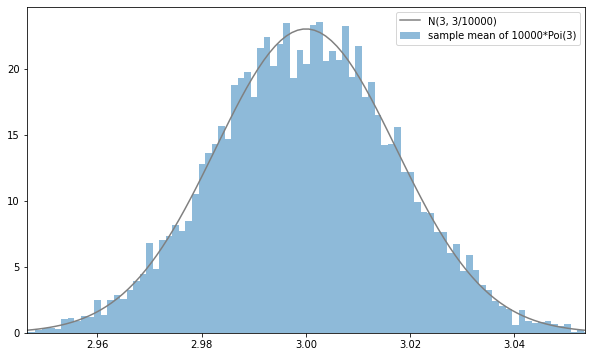

In [50]:
# 중심극한정리 예시(X1, X2, ... X10000~Poi(3))의 표본평균 분포 시각화
# X~N(3,3/10000) 시각화

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
        alpha=0.5, label='sample mean of 10000*Poi(3)')
ax.plot(xs, rv_true.pdf(xs), label='N(3, 3/10000)', color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

### 대수의 법칙
- 확률변수 X1, X2, ... Xn이 서로 독립이고, 기대값이 뮤, 분산이 시그마^2인 확률분포를 따를 때, n이 커짐에 따라 표본평균은 뮤에 수렴한다.
- 즉, 표본 크기를 키우면 표본평균(추정)은 모평균(정답)에 수렴한다는 뜻

In [51]:
# 주사위가 6이 나오는지 여부로 파악
p = 1/6
rv = stats.bernoulli(p)

n = int(1e5)
sample = rv.rvs((n, 4))
space = np.linspace(100, n, 50).astype(int)
plot_list = np.array([np.mean(sample[:sp], axis=0)
                      for sp in space]).T

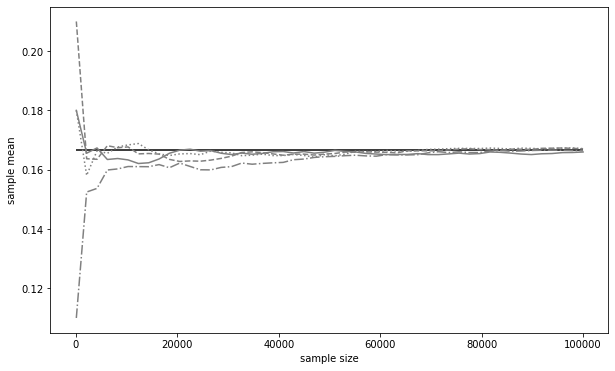

In [53]:
# 각 시행은 Bern(1/6)을 따르므로, 표본 크기가 커짐에 따라 표본평균은 1/6로 수렴하게 된다.

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

for pl, ls in zip(plot_list, linestyles):
    ax.plot(space, pl, ls=ls, color='gray')
ax.hlines(p, -1, n, 'k')
ax.set_xlabel('sample size')
ax.set_ylabel('sample mean')

plt.show()